In [1]:
import json
from collections import defaultdict

import altair as alt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from umap import UMAP
import umap.plot

from sklearn.cluster import SpectralCoclustering
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

In [2]:
from scipy import sparse

# citeulike_user_item_19core
incd_mat = sparse.load_npz('citeulike_user_item_19core.npz')

# df = pd.DataFrame.sparse.from_spmatrix(incd_mat)

In [3]:
# df

In [4]:
bicl = SpectralCoclustering(n_clusters=10, random_state=0)
bicl.fit(incd_mat)


SpectralCoclustering(n_clusters=10, random_state=0)

In [5]:
print('Column (Item) cluster counts:', np.unique(bicl.column_labels_, return_counts=True)[1])
print('Row (user) cluster counts:', np.unique(bicl.row_labels_, return_counts=True)[1])

Column (Item) cluster counts: [4280   30 5396  179  138    7 5096 1578   96    7]
Row (user) cluster counts: [ 905    2  795   10   85 1163  310    7]


In [6]:
print(bicl.row_labels_.shape)
print(bicl.column_labels_.shape)

(3277,)
(16807,)


In [7]:
row_idx, col_idx = np.argsort(bicl.row_labels_), np.argsort(bicl.column_labels_)

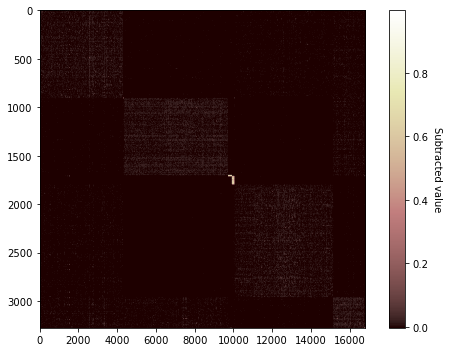

In [32]:
incd_mat_dense = incd_mat.toarray()
sorted_mat=incd_mat_dense[row_idx,:]
# sorted_mat=incd_mat[row_idx,:]
sorted_mat=sorted_mat[:,col_idx]
sorted_mat = sorted_mat - np.mean(sorted_mat)
fig = plt.figure(figsize=(7, 5))
ax = plt.gca()
im = ax.imshow(sorted_mat, aspect=5, cmap='pink')
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Subtracted value', rotation=-90, va="bottom")
fig.tight_layout()

In [27]:
# Dataframe Version


# df_sorted = df.iloc[row_idx, col_idx]
# rows_sorted = bicl.row_labels_[row_idx]
# cols_sorted = bicl.column_labels_[col_idx]
# df_center = df_sorted - df_sorted.mean()
# fig = plt.figure(figsize=(7, 5))
# ax = plt.gca()
# im = ax.imshow(df_center, aspect=5, cmap='PRGn')
# cbar = fig.colorbar(im, ax=ax)
# cbar.ax.set_ylabel('Subtracted value', rotation=-90, va="bottom")
# fig.tight_layout()

In [28]:
row_labels = pd.Series(bicl.row_labels_, index=range(incd_mat.shape[0]), name='cluster')

In [29]:
mapper = UMAP(n_neighbors=19, min_dist=0.1, 
              metric='jaccard', random_state=0).fit(incd_mat)

/home/hoyin/anaconda3/envs/solaris2/lib/python3.7/site-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


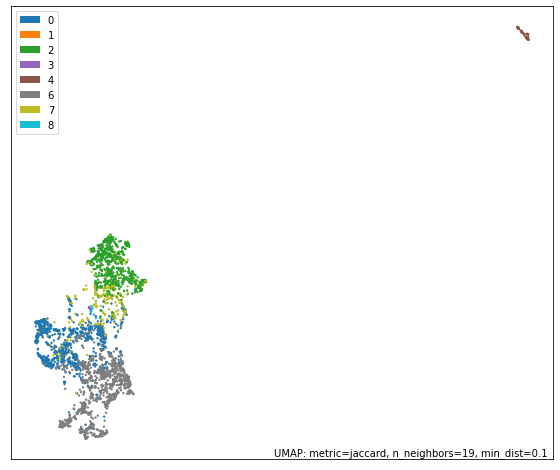

In [30]:
umap.plot.points(mapper, labels=row_labels, color_key_cmap='tab10', 
                 width=700, height=600);

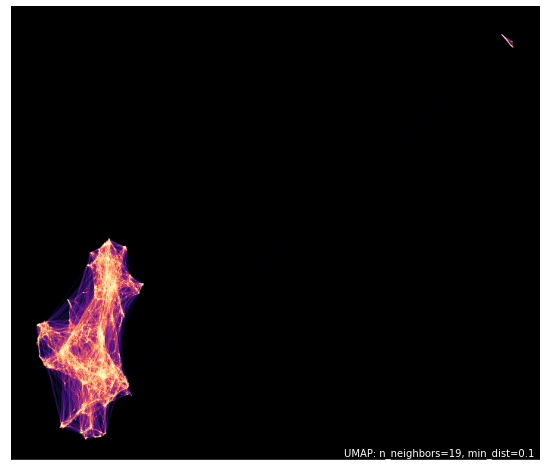

In [31]:
umap.plot.connectivity(mapper, edge_cmap='magma', background='black', 
                       width=700, height=600);